In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

In [2]:
df=pd.read_csv("C:/Users/User/Downloads/New Folder/CremaD_Features.csv")
df.head()

,MFCC 1,MFCC 2,MFCC 3,MFCC 4,MFCC 5,MFCC 6,MFCC 7,MFCC 8,MFCC 9,MFCC 10,...,Std LPC,ZCR,Total Energy,Mean Energy,Std Energy,Pitch,Intensity,HNR,RMS,Label
0,-11.103,2.5344,0.28414,0.93873,0.393820,0.21358,-0.163200,0.108290,-0.083246,-0.089088,...,0.41263,0.105610,303.750,8.9338,14.8780,146.05,85.686,13.782,0.042800,Angry
1,-10.089,2.6393,0.30569,0.51412,-0.077443,0.40460,-0.135590,0.174600,-0.210980,0.026687,...,0.47449,0.121510,322.850,11.1330,17.7890,149.48,88.351,10.767,0.050229,Angry
2,-12.929,2.8997,0.36208,0.75309,0.314360,0.36573,0.024323,0.225180,-0.077379,0.029433,...,0.46065,0.079629,43.494,1.4030,2.6300,133.46,80.086,11.032,0.016692,Angry
3,-12.080,2.9235,0.35644,0.69404,0.151860,0.47770,-0.107400,0.064882,-0.152480,0.112210,...,0.47939,0.103090,68.109,1.7027,2.2518,149.64,82.946,12.591,0.021366,Angry
4,-11.987,2.6495,0.16866,1.18430,0.337630,0.29686,0.065100,0.127550,-0.072729,-0.026997,...,0.49599,0.082527,115.140,3.5981,6.2859,144.11,83.064,11.559,0.026872,Angry


In [3]:
class_counts = df['Label'].value_counts()

In [15]:
class_counts

Angry      1087
Disgust    1087
Fearful    1087
Happy      1087
Sad        1087
Name: Label, dtype: int64

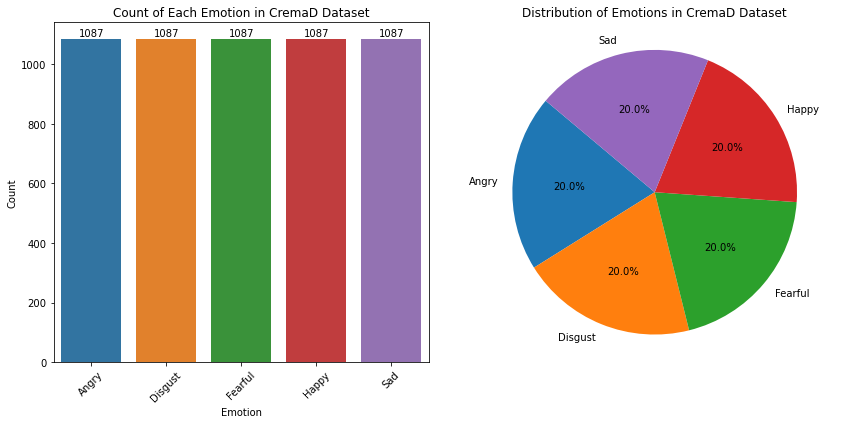

In [4]:
# Create a figure with two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot the bar plot on the first subplot
sns.countplot(x='Label', data=df, order=class_counts.index, ax=axs[0])
axs[0].set_xlabel('Emotion')
axs[0].set_ylabel('Count')
axs[0].set_title('Count of Each Emotion in CremaD Dataset')
axs[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
# Get bar counts
bar_counts = axs[0].containers[0]
# Add annotations (class counts) on top of each bar
for bar, count in zip(bar_counts, class_counts):
    yval = bar.get_height()  # Get the height of each bar
    axs[0].text(bar.get_x() + bar.get_width() / 2, yval + 0.1, count, ha='center', va='bottom')  # Add text annotation with class count

# Plot the pie chart on the second subplot
axs[1].pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140)
axs[1].set_title('Distribution of Emotions in CremaD Dataset')
axs[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

In [5]:
df.shape

(5435, 121)

In [16]:
X = df.iloc[:,:-1]
y = df['Label']

In [24]:
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

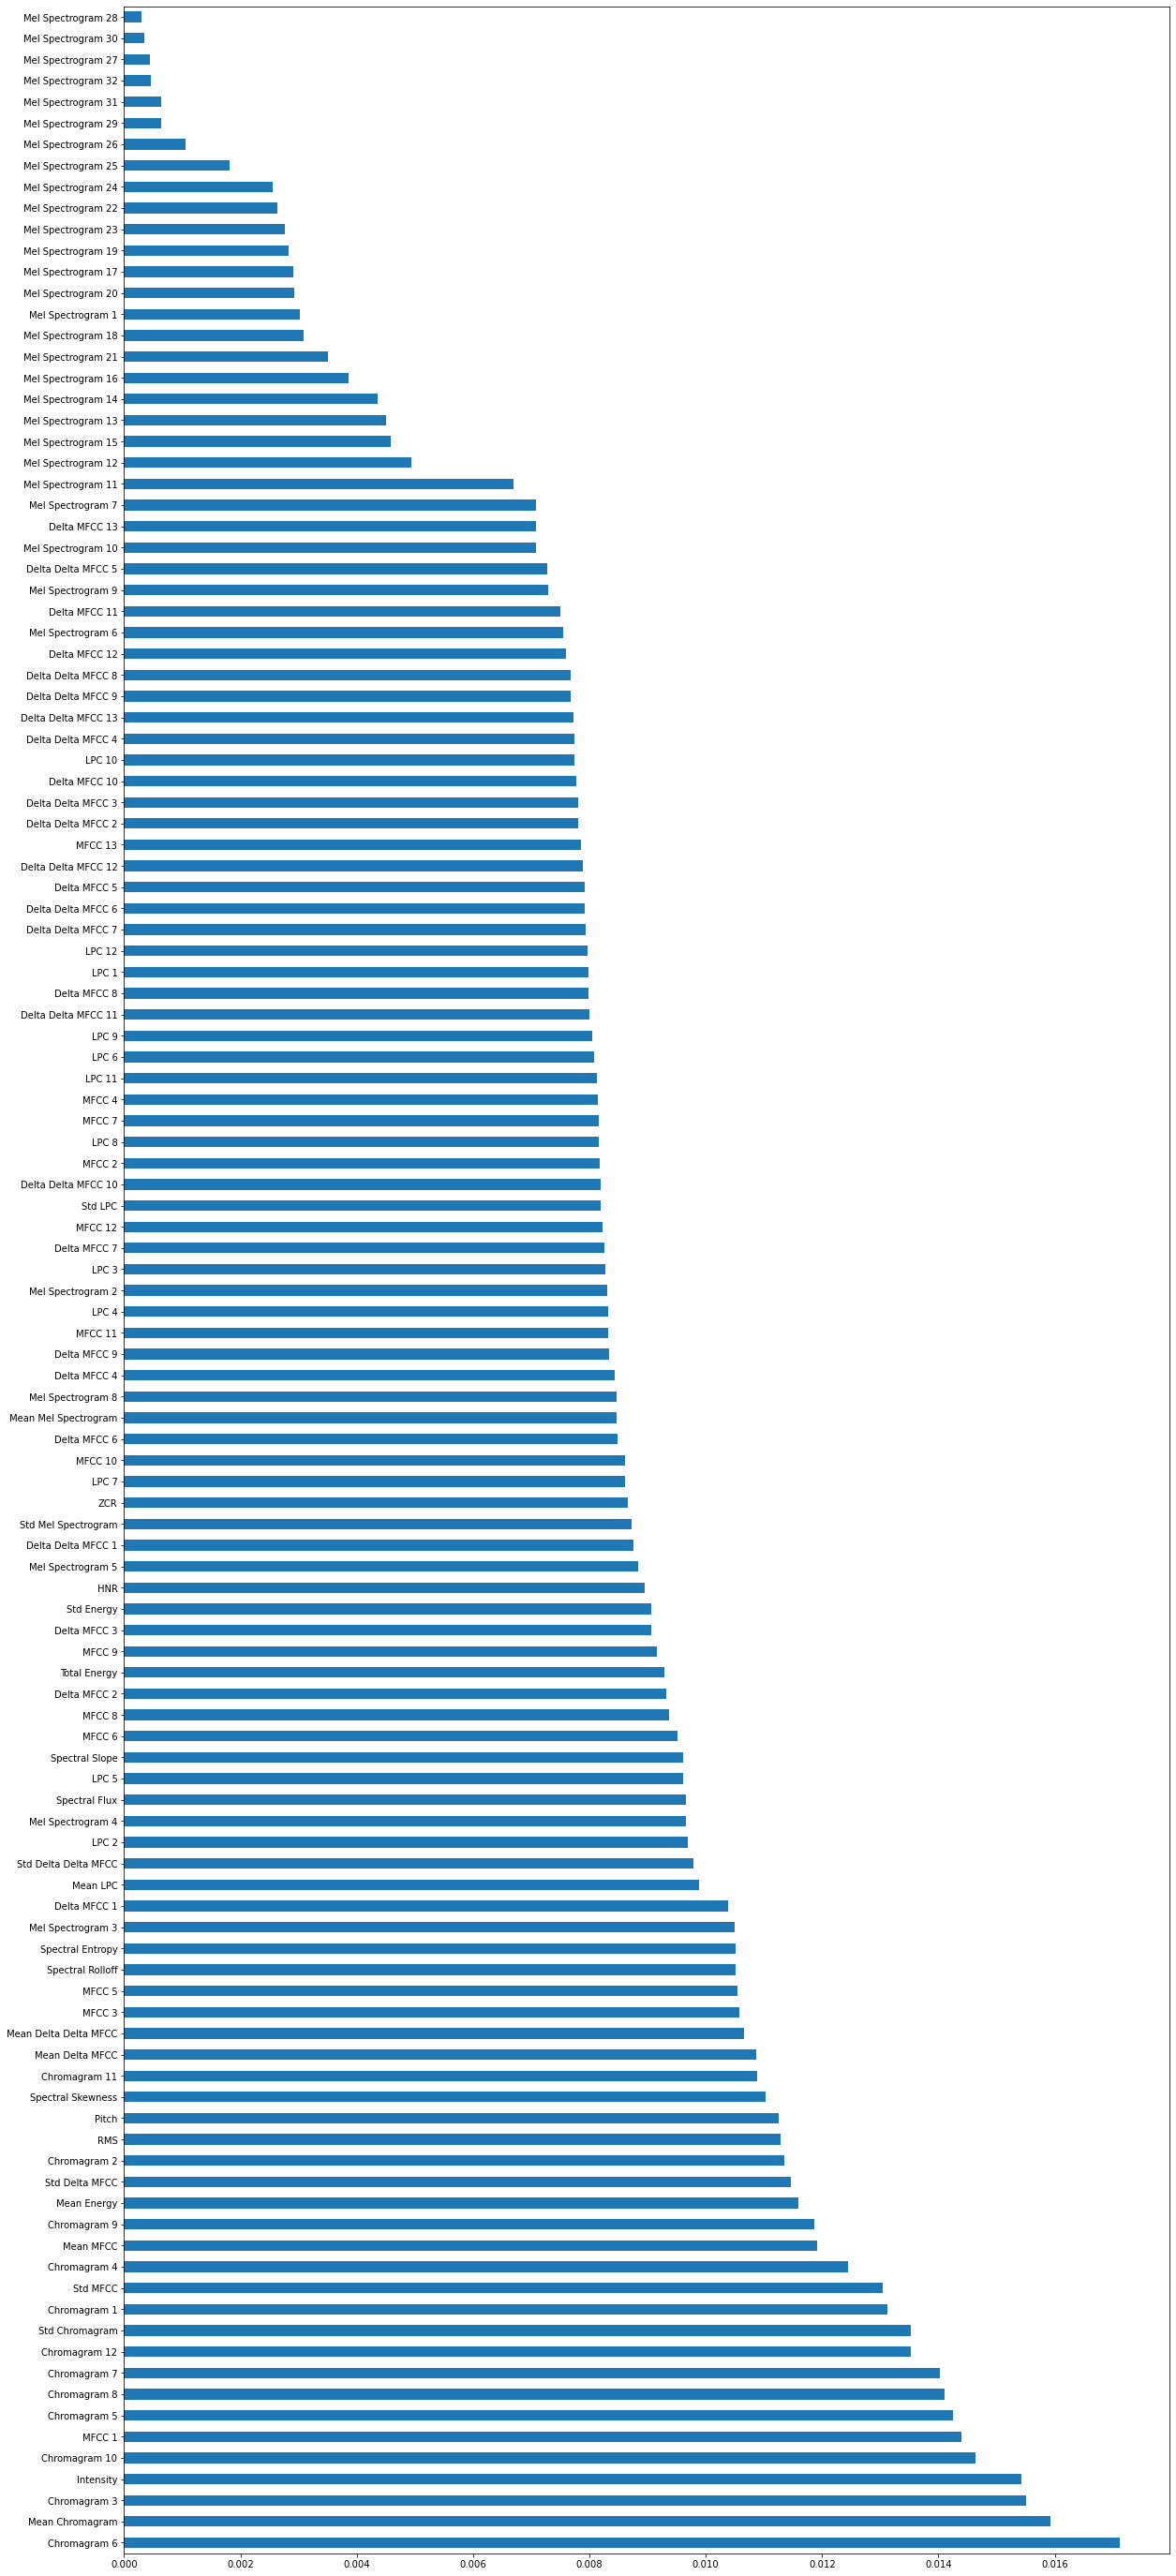

In [25]:
fea = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(20, 50))
fea.nlargest(120).plot(kind='barh')
plt.show()

In [26]:
selected_features = fea.nlargest(30).index

X = X[selected_features]
y = df['Label']

In [27]:
selected_features

Index(['Chromagram 6', 'Mean Chromagram', 'Chromagram 3', 'Intensity',
       'Chromagram 10', 'MFCC 1', 'Chromagram 5', 'Chromagram 8',
       'Chromagram 7', 'Chromagram 12', 'Std Chromagram', 'Chromagram 1',
       'Std MFCC', 'Chromagram 4', 'Mean MFCC', 'Chromagram 9', 'Mean Energy',
       'Std Delta MFCC', 'Chromagram 2', 'RMS', 'Pitch', 'Spectral Skewness',
       'Chromagram 11', 'Mean Delta MFCC', 'Mean Delta Delta MFCC', 'MFCC 3',
       'MFCC 5', 'Spectral Rolloff', 'Spectral Entropy', 'Mel Spectrogram 3'],
      dtype='object')

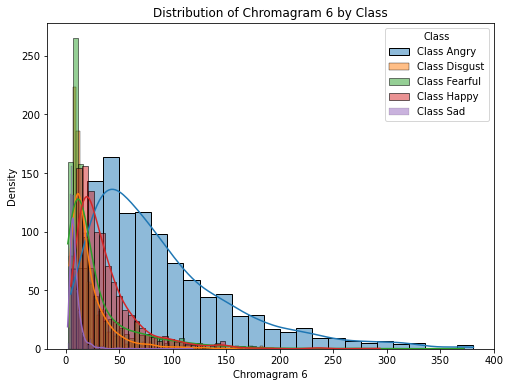

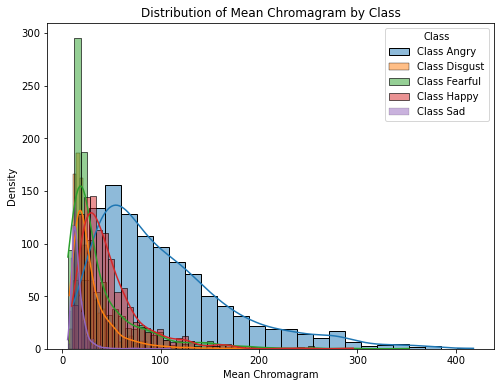

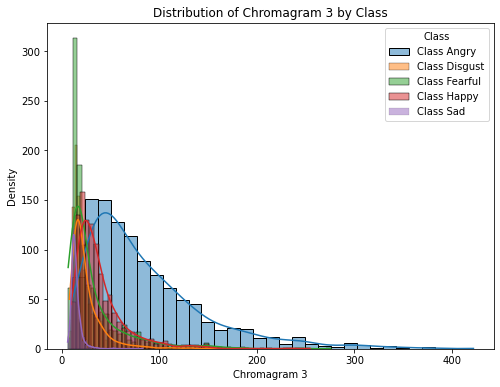

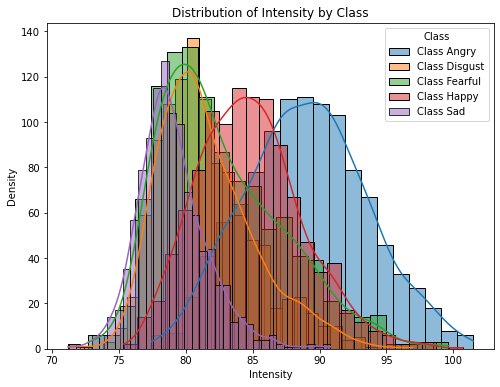

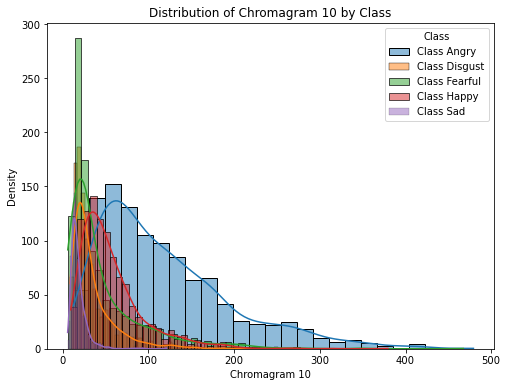

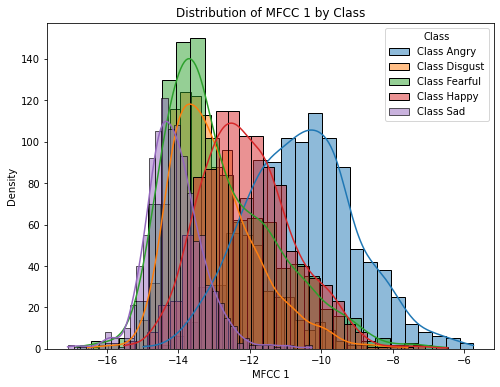

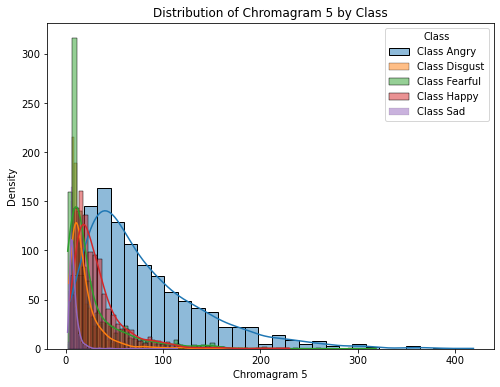

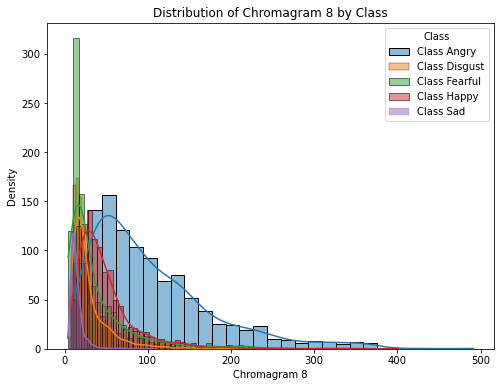

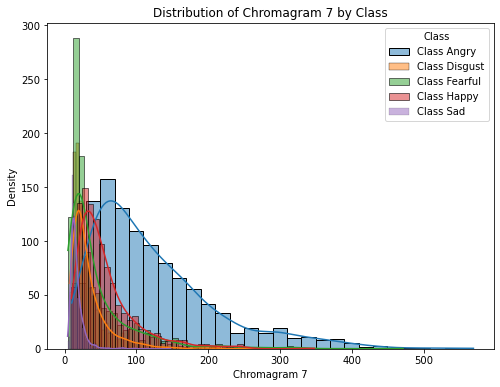

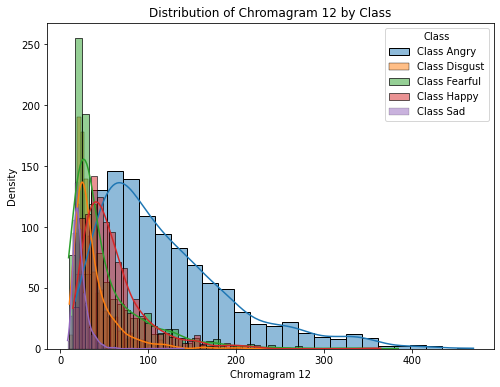

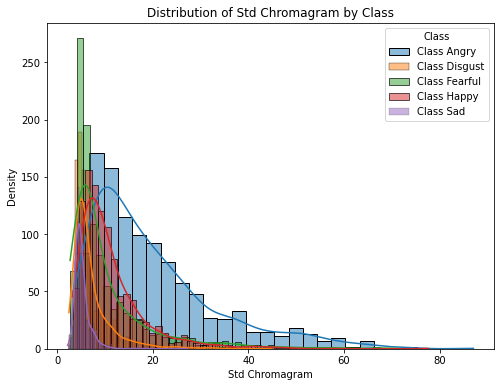

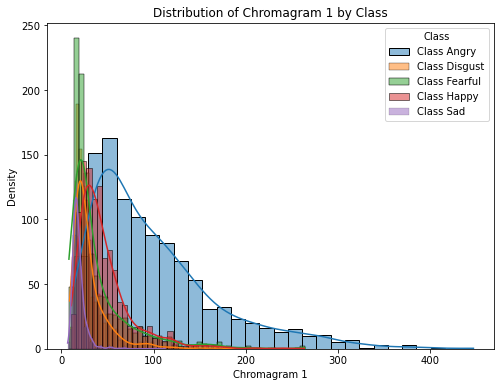

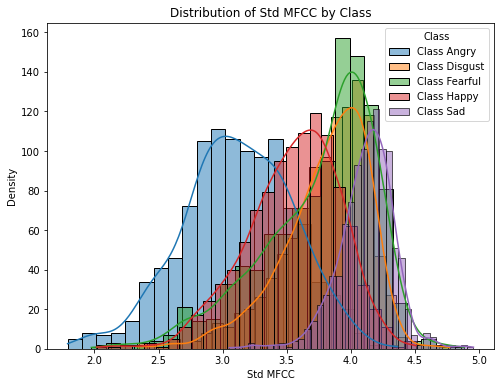

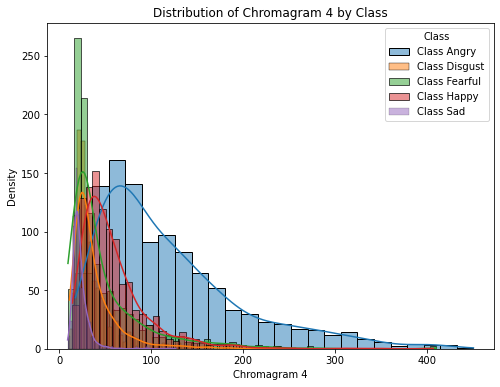

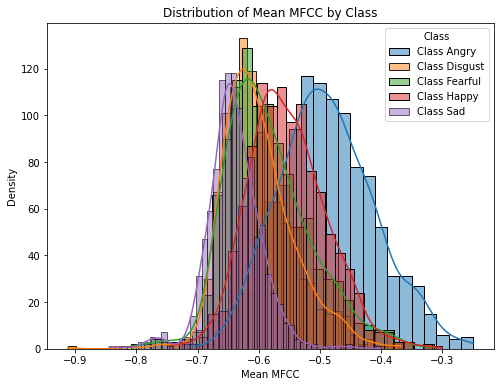

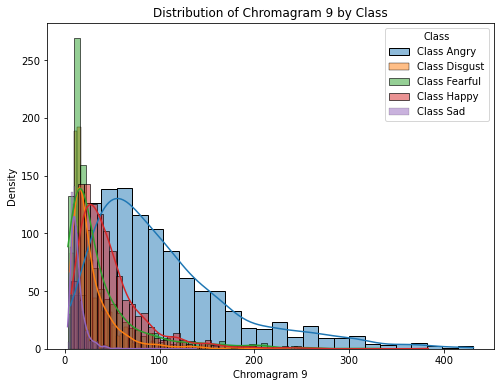

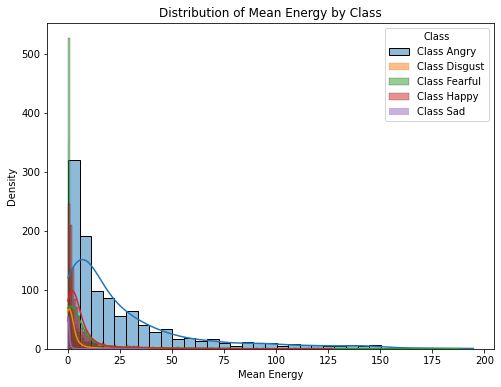

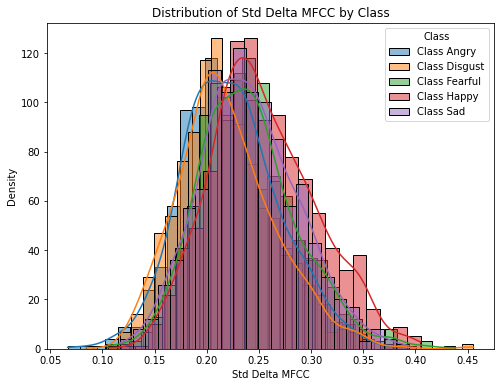

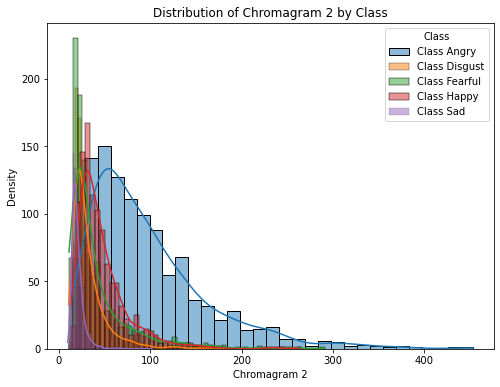

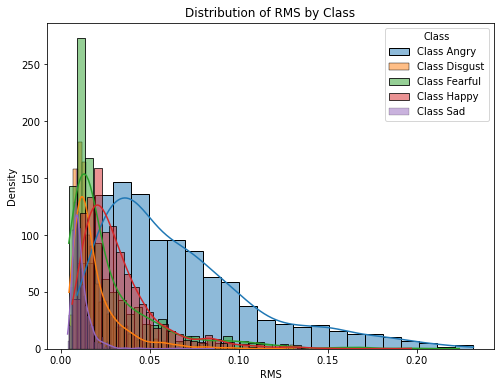

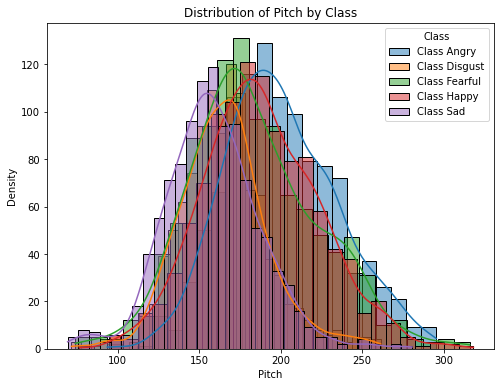

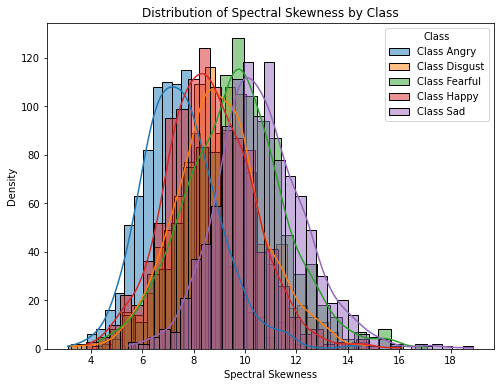

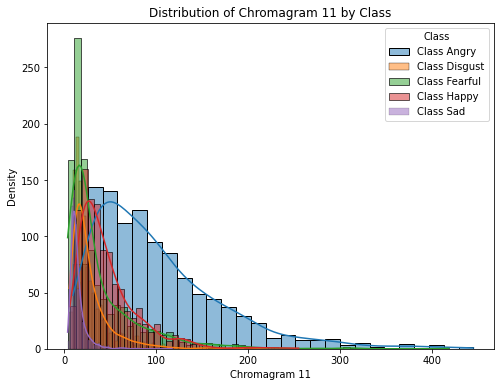

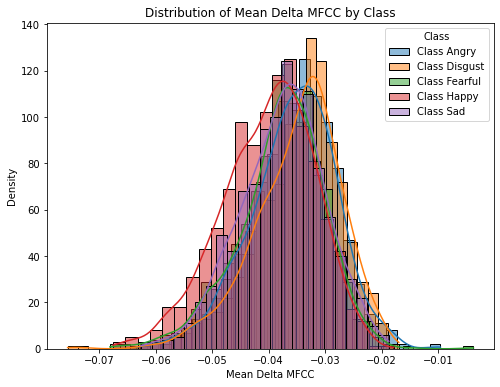

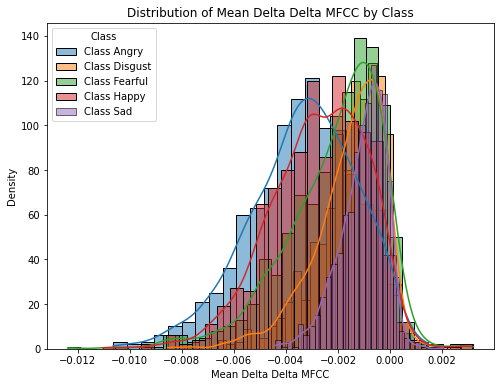

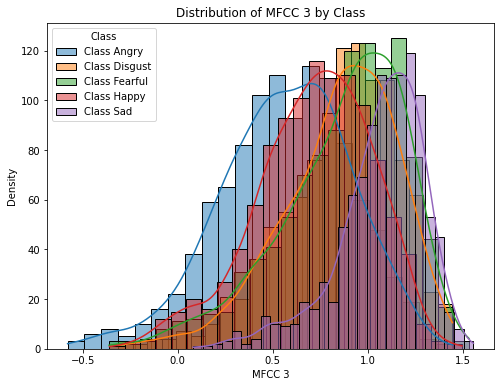

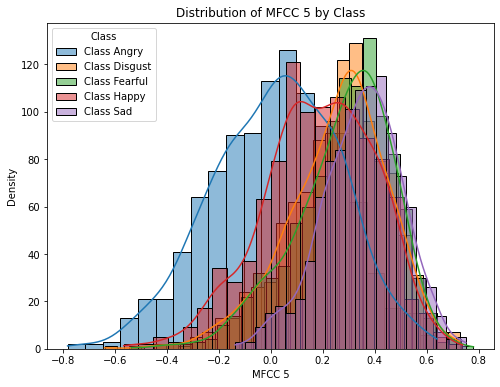

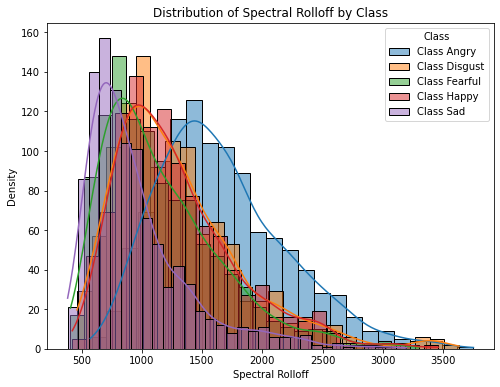

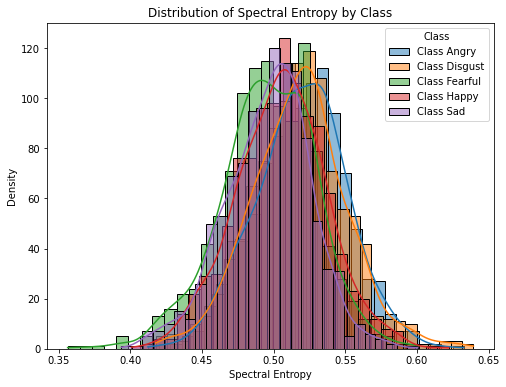

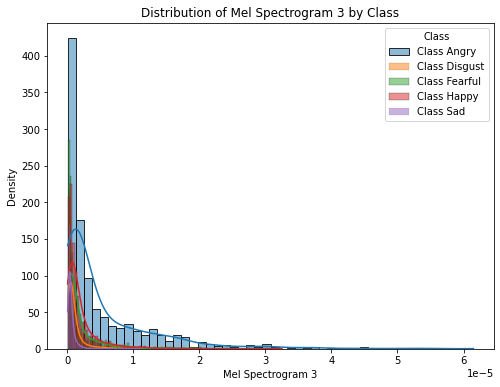

In [28]:
# Concatenate X and y into a single array for easier manipulation
data = np.column_stack((X, y))

# Get the number of features
num_features = X.shape[1]

# Define a custom color palette with 5 distinct colors
custom_palette = sns.color_palette("tab10", 5)

# Iterate over each feature and plot its distribution for each class
for i, feature_name in enumerate(selected_features):
    plt.figure(figsize=(8, 6))
    for label, color in zip(np.unique(y), custom_palette):
        sns.histplot(data[data[:, -1] == label, i], kde=True, label=f'Class {label}', color=color)
    plt.title(f'Distribution of {feature_name} by Class')
    plt.xlabel(feature_name)
    plt.ylabel('Density')
    plt.legend(title='Class')
    plt.show()

In [19]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [30]:
# Initialize variables for best accuracy, C, gamma, model, best training and testing data
best_accuracy = 0
best_C = None
best_gamma = None
best_model = None
best_X_train = None
best_X_test = None
best_y_train = None
best_y_test = None

no_improvement_count = 0  # Initialize the count for no improvement

C_values = np.around(np.arange(1, 15, 0.1), 2)
gamma_values = np.around(np.arange(0.01, 0.05, 0.01), 2)

while no_improvement_count < 20:  # Set the maximum number of iterations without improvement
    for C in C_values:  # Iterate over C values from 1 to 15
        for gamma in gamma_values:  # Iterate over gamma values from 0.01 to 1
            # Split the data into training and testing sets
            X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)
            
            # Initialize and train the SVM classifier
            svm = SVC(kernel='rbf', C=C, gamma=gamma)
            svm.fit(X_train, y_train)

            # Predict on the testing data
            y_pred = svm.predict(X_test)
            
            # Calculate accuracy
            acc = accuracy_score(y_test, y_pred)
            
            # Check if the current accuracy is better than the best accuracy
            if acc > best_accuracy:
                best_accuracy = acc
                best_C = C
                best_gamma = gamma
                best_model = svm
                best_X_train = X_train
                best_X_test = X_test
                best_y_train = y_train
                best_y_test = y_test
                
                no_improvement_count = 0
                
                print("Best accuracy so far:", best_accuracy)
                print("Best C value so far:", best_C)
                print("Best gamma value so far:", best_gamma)
            else:
                # Increment the count if there's no improvement
                no_improvement_count += 1

# Save the best model
joblib.dump(best_model, 'CremaD Model.joblib')

# Save the best training and testing data
joblib.dump(best_X_train, 'X_train.joblib')
joblib.dump(best_X_test, 'X_test.joblib')
joblib.dump(best_y_train, 'y_train.joblib')
joblib.dump(best_y_test, 'y_test.joblib')

# After the loop finishes, print the final best accuracy and the corresponding C and gamma values
print("Final best accuracy:", best_accuracy)
print("Final best C value:", best_C)
print("Final best gamma value:", best_gamma)

Best accuracy so far: 0.5032198712051518
Best C value so far: 1.0
Best gamma value so far: 0.01
Best accuracy so far: 0.5243790248390064
Best C value so far: 1.0
Best gamma value so far: 0.02
Best accuracy so far: 0.5574977000919963
Best C value so far: 1.0
Best gamma value so far: 0.04
Best accuracy so far: 0.5676172953081877
Best C value so far: 1.5
Best gamma value so far: 0.02
Best accuracy so far: 0.5712971481140754
Best C value so far: 2.1
Best gamma value so far: 0.04
Best accuracy so far: 0.5731370745170193
Best C value so far: 2.5
Best gamma value so far: 0.03
Best accuracy so far: 0.5749770009199632
Best C value so far: 3.2
Best gamma value so far: 0.03
Best accuracy so far: 0.5860165593376265
Best C value so far: 4.3
Best gamma value so far: 0.03
Best accuracy so far: 0.5869365225390984
Best C value so far: 5.7
Best gamma value so far: 0.03
Best accuracy so far: 0.5878564857405704
Best C value so far: 5.7
Best gamma value so far: 0.04
Best accuracy so far: 0.5896964121435143

In [20]:
# Load the saved model
model = joblib.load('CremaD Model.joblib')

# Load the saved training and testing data
X_train = joblib.load('X_train.joblib')
X_test = joblib.load('X_test.joblib')
y_train = joblib.load('y_train.joblib')
y_test = joblib.load('y_test.joblib')

In [21]:
# Predict on the test data
y_pred = model.predict(X_test)

In [22]:
# Generate the classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

       Angry       0.70      0.67      0.69       217
     Disgust       0.58      0.60      0.59       217
     Fearful       0.57      0.39      0.46       218
       Happy       0.52      0.53      0.53       218
         Sad       0.62      0.82      0.71       217

    accuracy                           0.60      1087
   macro avg       0.60      0.60      0.60      1087
weighted avg       0.60      0.60      0.60      1087



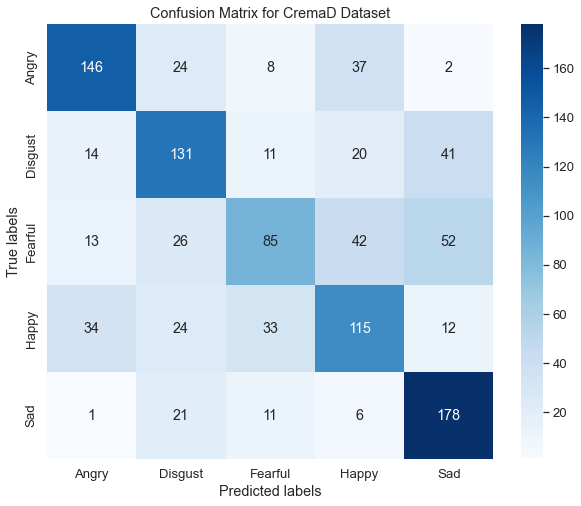

In [23]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Get class labels
classes = model.classes_

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)  # Adjust font size for better visualization
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for CremaD Dataset')
plt.show()

In [24]:
# Calculate accuracy of each class
class_accuracies = {}
for i, cls in enumerate(classes):
    # True positives for class i
    TP = cm[i, i]
    # Total instances for class i
    total_instances = np.sum(cm[i, :])
    # Accuracy for class i
    class_accuracy = TP / total_instances
    class_accuracies[cls] = class_accuracy

# Print class-wise accuracies
print("Class-wise Accuracies:")
for cls, accuracy in class_accuracies.items():
    print(f"{cls}: {accuracy:.2f}")

Class-wise Accuracies:
Angry: 0.67
Disgust: 0.60
Fearful: 0.39
Happy: 0.53
Sad: 0.82


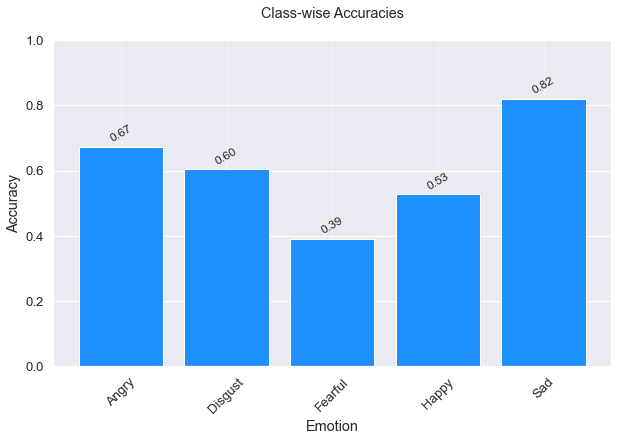

In [25]:
# Extract class labels and accuracies
class_labels = list(class_accuracies.keys())
accuracies = list(class_accuracies.values())

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(class_labels, accuracies, color='dodgerblue')
plt.xlabel('Emotion')
plt.ylabel('Accuracy')
plt.title('Class-wise Accuracies\n')
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1 for better visualization
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='x', linestyle='--', alpha=0.5)  # Add horizontal grid lines
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom', fontsize=12, rotation=30)
plt.show()

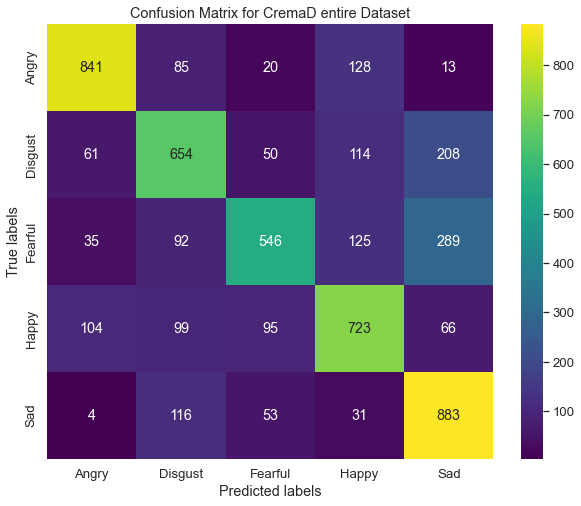

In [26]:
# Generate predictions for the entire dataset
y_pred_full = model.predict(X)

# Generate the confusion matrix
cm_full = confusion_matrix(y, y_pred_full)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)  # Adjust font size for better visualization
sns.heatmap(cm_full, annot=True, cmap='viridis', fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for CremaD entire Dataset')
plt.show()

In [27]:
# Calculate accuracy of each class
class_accuracies = {}
for i, cls in enumerate(classes):
    # True positives for class i
    TP = cm_full[i, i]
    # Total instances for class i
    total_instances = np.sum(cm_full[i, :])
    # Accuracy for class i
    class_accuracy = TP / total_instances
    class_accuracies[cls] = class_accuracy

# Print class-wise accuracies
print("Class-wise Accuracies:")
for cls, accuracy in class_accuracies.items():
    print(f"{cls}: {accuracy:.2f}")

Class-wise Accuracies:
Angry: 0.77
Disgust: 0.60
Fearful: 0.50
Happy: 0.67
Sad: 0.81


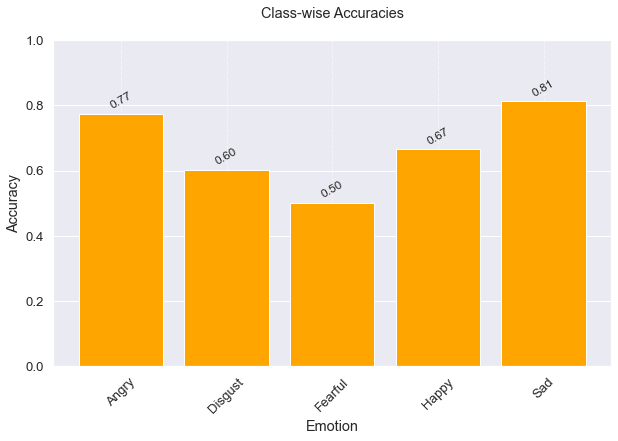

In [28]:
# Extract class labels and accuracies
class_labels = list(class_accuracies.keys())
accuracies = list(class_accuracies.values())

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(class_labels, accuracies, color='orange')
plt.xlabel('Emotion')
plt.ylabel('Accuracy')
plt.title('Class-wise Accuracies\n')
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1 for better visualization
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='x', linestyle='--', alpha=0.5)  # Add horizontal grid lines
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom', fontsize=12, rotation=30)
plt.show()